# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dzaky Muhammad Zidane
- **Email:** acelolik09@gmail.com
- **ID Dicoding:** dzaky_zidan_09cg

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah total transaksi bike sharing?
- Apakah ada perbedaan signifikan dalam jumlah transaksi bike sharing antara hari libur dan hari kerja?
- Bagaimana cuaca mempengaruhi jumlah pengguna casual dan registered?
- Seberapa besar pengaruh temperatur terhadap jumlah total transaksi bike sharing?

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [11]:
df = pd.read_csv('./data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset ini mencatat jumlah transaksi peminjaman sepeda harian dari tahun 2011 hingga 2012.
- Terdapat informasi mengenai kondisi lingkungan harian dan kategori pengguna layanan peminjaman sepeda.
- Atribut yang ada dalam dataset meliputi:
  - instant: Indeks
  - dteday: Tanggal
  - season: Musim (1: Musim semi, 2: Musim panas, 3: Musim gugur, 4: Musim dingin)
  - yr: Tahun (0: 2011, 1: 2012)
  - mnth: Bulan (1 hingga 12)
  - holiday: Status hari libur
  - weekday: Hari dalam seminggu
  - workingday: Menunjukkan apakah hari tersebut adalah akhir pekan atau hari libur (0) atau bukan (1).
  - weathersit:
    - 1: Cuaca cerah, sedikit awan, atau berawan sebagian
    - 2: Cuaca berkabut atau berawan dengan sedikit awan
    - 3: Cuaca dengan hujan ringan, salju ringan, atau badai petir
    - 4: Cuaca ekstrem dengan hujan lebat, salju, atau badai petir
  - temp: Suhu dalam derajat Celsius yang dinormalisasi
  - atemp: Suhu yang dirasakan dalam derajat Celsius yang dinormalisasi
  - hum: Kelembapan yang dinormalisasi
  - windspeed: Kecepatan angin yang dinormalisasi
  - casual: Jumlah pengguna biasa (casual user)
  - registered: Jumlah pengguna terdaftar
  - cnt: Total jumlah transaksi peminjaman dari semua kategori pengguna.

### Assessing Data

In [12]:
df.info()
print("\nJumlah duplicate: ", df.duplicated().sum(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Jumlah duplicate:  0 



In [13]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Beberapa kolom telah dinormalisasi dengan nilai di antara 0 dan 1. Kolom yang telah dinormalisasi diantaranya yakni:
  - temp (Temperatur dalam celcius)
  - atemp (Temperature yang dirasakan dalam celcius)
  - hum (Kelembapan)
  - windspeed (Kecepatan angin)
- Tidak adanya duplikasi pada dataset
- Tidak adanya missing value yang ditemukan
- Dataset sudah dalam keadaan bersih sehingga tidak diperlukan cleaning data.

### Cleaning Data

**Insight:**
- Dataset terlihat sudah dalam keadaan bersih sehingga tidak diperlukan cleaning data.

## Exploratory Data Analysis (EDA)

### Explore dataset

In [15]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [16]:
analisis_musim = df.groupby('season').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'})
analisis_musim = analisis_musim.rename(index={1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

print("Analisis Jumlah Transaksi per Musim:\n")
print(analisis_musim)

Analisis Jumlah Transaksi per Musim:

              casual  registered      cnt
season                                   
Musim Semi     60622      410726   471348
Musim Panas   203522      715067   918589
Musim Gugur   226091      835038  1061129
Musim Dingin  129782      711831   841613


**Insight:**
- Musim gugur adalah musim dengan transaksi peminjaman paling banyak
- Musim semi adalah musim dengan transaksi peminjaman paling sedikit

In [17]:
# Analisis jumlah transaksi per kondisi cuaca
analisis_cuaca = df.groupby('weathersit').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'})

# Mengubah nama indeks untuk kejelasan
analisis_cuaca = analisis_cuaca.rename(index={
    1: 'Cerah',
    2: 'Kabut',
    3: 'Salju Ringan/Hujan Ringan',
})

# Menampilkan hasil analisis
print("Analisis Jumlah Transaksi per Kondisi Cuaca:\n")
print(analisis_cuaca)

Analisis Jumlah Transaksi per Kondisi Cuaca:

                           casual  registered      cnt
weathersit                                            
Cerah                      446346     1811606  2257952
Kabut                      169776      827082   996858
Salju Ringan/Hujan Ringan    3895       33974    37869


**Insight:**
- Cuaca Cerah adalah kondisi dengan transaksi peminjaman tertinggi, mencapai 2.257.952 transaksi.
- Cuaca Salju Ringan/Hujan Ringan adalah kondisi dengan transaksi peminjaman terendah, hanya 37.869 transaksi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah transaksi bike sharing?

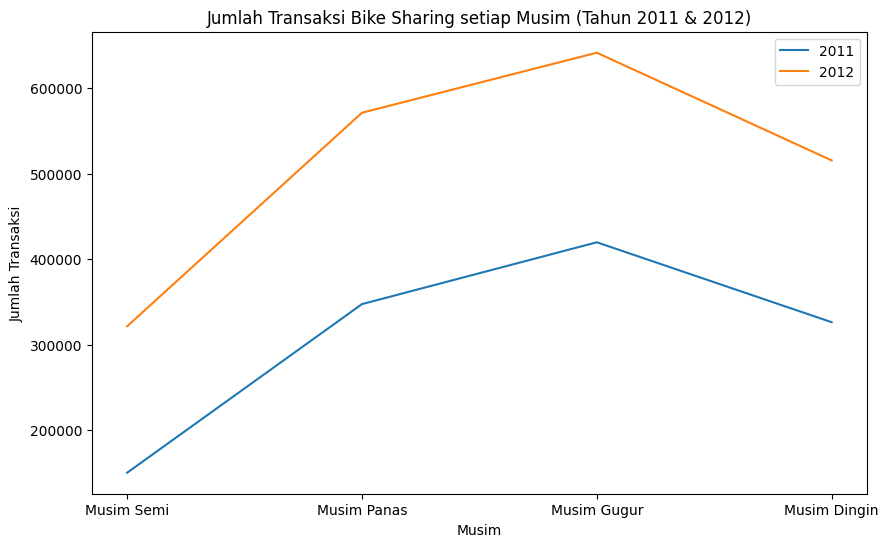

In [24]:
season_year_cnt = df.groupby(['season', 'yr'])['cnt'].sum().unstack()
season_year_cnt.plot(kind='line', figsize=(10, 6))

plt.title('Jumlah Transaksi Bike Sharing setiap Musim (Tahun 2011 & 2012)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Transaksi')
plt.xticks([1, 2, 3, 4], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.legend(['2011', '2012'])
plt.show()

## Analisis Lanjutan

### Pertanyaan 2: Bagaimana cuaca mempengaruhi jumlah pengguna, baik casual dan registered?

Manual grouping untuk mengkategorikan data cuaca menjadi label yang lebih mudah dipahami, yaitu:
- Cerah
- Berkabut
- Salju Ringan/Hujan Ringan
Bar plot digunakan untuk memvisualisasikan rata-rata peminjaman pengguna biasa (casual) dan pengguna terdaftar (registered) berdasarkan kategori cuaca. Teknik ini bertujuan untuk mengidentifikasi bagaimana kondisi cuaca mempengaruhi jumlah peminjaman sepeda oleh kedua kelompok pengguna.
Dengan cara ini, perbedaan rata-rata peminjaman pada berbagai kondisi cuaca dapat dengan mudah dibandingkan dan dianalisis.

<Figure size 1200x600 with 0 Axes>

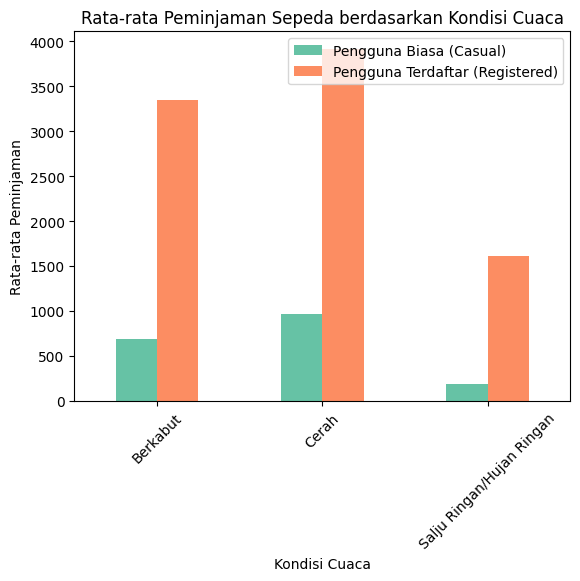

In [23]:
# Manual grouping untuk kondisi cuaca
weather_labels = {
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Salju Ringan/Hujan Ringan'
}

df['weather_label'] = df['weathersit'].map(weather_labels)

# Menghitung rata-rata peminjaman berdasarkan kategori cuaca
avg_rentals = df.groupby('weather_label').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()

# Visualisasi data dengan bar plot
plt.figure(figsize=(12, 6))
avg_rentals.set_index('weather_label').plot(kind='bar', stacked=False, color=['#66c2a5', '#fc8d62'])
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(rotation=45)
plt.legend(['Pengguna Biasa (Casual)', 'Pengguna Terdaftar (Registered)'])
plt.show()

### Pertanyaan 3: Seberapa besar pengaruh temperatur terhadap jumlah total transaksi bike sharing?

Binning temperatur membagi data temperatur menjadi tiga kategori: Rendah, Sedang, dan Tinggi. Bar plot kemudian digunakan untuk memvisualisasikan rata-rata total peminjaman sepeda dalam setiap kategori temperatur. Teknik ini bertujuan untuk mengidentifikasi bagaimana variasi temperatur mempengaruhi jumlah total transaksi bike sharing, memungkinkan kita untuk melihat dan menganalisis perbedaan rata-rata peminjaman sepeda pada berbagai tingkat temperatur secara jelas.

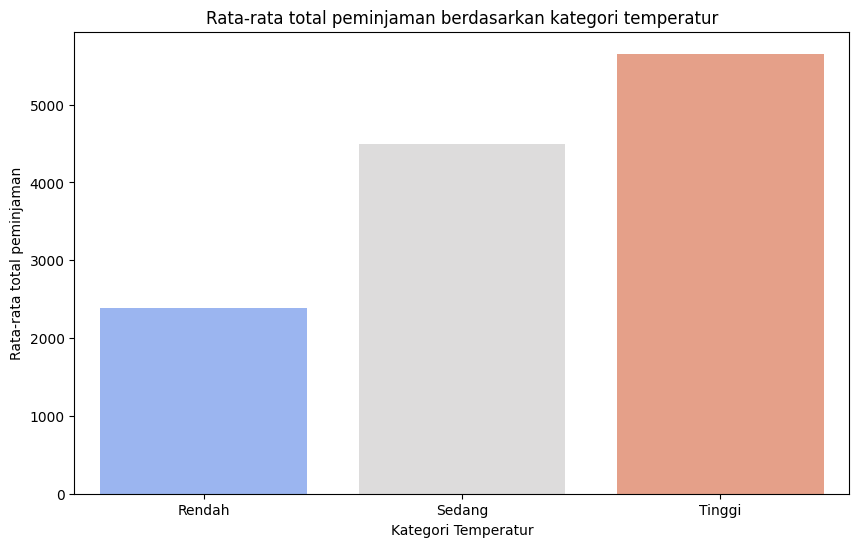

In [21]:
# Binning temperature
df['temp_bin'] = pd.cut(df['temp'], bins=[0, 0.3, 0.6, 1], labels=['Rendah', 'Sedang', 'Tinggi'])

# Menghitumg rata-rata total peminjaman berdasarkan kategori temperatur
temp_analysis = df.groupby('temp_bin', observed=True)['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='temp_bin', y='cnt', hue='temp_bin', data=temp_analysis, palette='coolwarm', dodge=False, legend=False)
plt.title('Rata-rata total peminjaman berdasarkan kategori temperatur')
plt.xlabel('Kategori Temperatur')
plt.ylabel('Rata-rata total peminjaman')
plt.legend([],[], frameon=False)
plt.show()

## Conclusion

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah total transaksi bike sharing?
Berdasarkan data selama dua tahun tersebut, musim memiliki dampak terhadap jumlah transaksi. Tren yang terlihat pada tahun 2011 sejalan dengan tren di tahun 2012, di mana jumlah transaksi peminjaman tertinggi terjadi pada musim gugur, diikuti oleh musim panas, musim dingin, dan terakhir musim semi.

### Pertanyaan 2: Bagaimana cuaca mempengaruhi jumlah pengguna, baik casual dan registered?
Pengguna casual dan registered keduanya cenderung melakukan peminjaman sepeda ketika cuaca sedang cerah atau berkabut, hanya sebagian kecil pengguna yang melakukan peminjaman sepeda ketika salju ringan/hujan ringan.

### Pertanyaan 3: Seberapa besar pengaruh temperatur terhadap jumlah total transaksi bike sharing?
Transaksi peminjaman sepeda lebih banyak ketika temperatur dalam keadaan tinggi, diikuti temperatur sedang, lalu paling sedikit yaitu temperatur rendah. Hal ini disebabkan karena pengguna menghindari cuaca salju ringan/hujan ringan saat melakukan peminjaman sepeda.